In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [5]:
def compute_loss(y, tx, w, typ):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    loss = 0
    N = len(y)
    if typ == "mse":
        loss = (1/(2*N))*np.sum(np.square(y - (tx@w)))
        
    elif typ == "mae":
        loss = (1/(2*N))*np.sum(np.abs(y - (tx@w)))
    # ***************************************************
    return loss

In [14]:
w = np.array([1, 2])
compute_loss(y, tx, w, "mse")

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

In [27]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    for j in range(len(w1)):
        for i in range(len(w0)):
            w = np.array([w0[i], w1[j]])
            loss = compute_loss(y, tx, w, "mse")
            losses[i, j] = loss
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.109 seconds


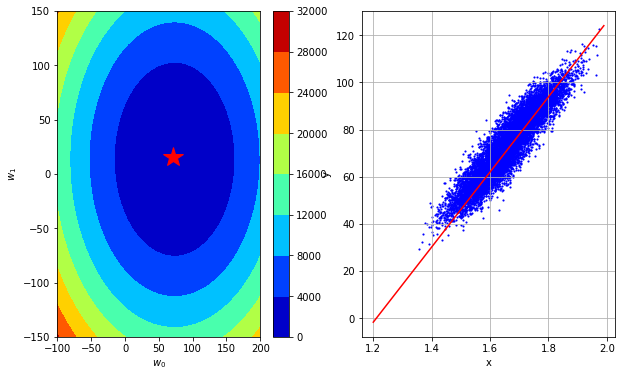

In [46]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving
w = np.array([w0_star, w1_star])

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [47]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    N = len(y)
    e = y - tx@w
    grad = (-1/N) * tx.T @ e
    # ***************************************************
    return grad

In [51]:
w1 = np.array([w0_star, w1_star])
print(compute_gradient(y, tx, w1))
w2 = np.array([100, 20])
print(compute_gradient(y, tx, w2))
w3 = np.array([50, 10])
print(compute_gradient(y, tx, w3))
w4 = np.array([25, 5])
print(compute_gradient(y, tx, w4))

[-1.86535057  1.82641001]
[26.706078    6.52028757]
[-23.293922    -3.47971243]
[-48.293922    -8.47971243]


Please fill in the functions `gradient_descent` below:

In [52]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        loss = compute_loss(y, tx, w, "mse")
        grad = compute_gradient(y, tx, w)
        w = w - gamma * grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [56]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147363, w1=9.435798704492242
Gradient Descent(1/49): loss=265.30246210896024, w0=66.69746902191571, w1=12.266538315839977
Gradient Descent(2/49): loss=37.878379550441295, w0=71.31498610804834, w1=13.115760199244315
Gradient Descent(3/49): loss=17.410212120174478, w0=72.70024123388814, w1=13.370526764265625
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772021
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879517
Gradient Descent(7/49): loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638307, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412117, w1

In [58]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [59]:
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]



In [68]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
 
    N = len(y)
    e = y - tx@w
    grad = (-1/N) * tx.T @ e
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    losses = []
    ws = [initial_w]
    w = initial_w   
    for it in range(max_iters):       
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 1):
            loss = compute_loss(minibatch_y, minibatch_tx, w, "mse")
            grad = compute_gradient(minibatch_y, minibatch_tx, w)
            w = w - gamma * grad
            losses.append(loss)
            ws.append(w)
    # ***************************************************
    return losses, ws

In [69]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.036 seconds


In [70]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [71]:
def load_data(sub_sample=True, add_outlier=False):
    """Load data and convert it to the metrics system."""
    path_dataset = "height_weight_genders.csv"
    data = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[1, 2])
    height = data[:, 0]
    weight = data[:, 1]
    gender = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[0],
        converters={0: lambda x: 0 if b"Male" in x else 1})
    # Convert to metric system
    height *= 0.025
    weight *= 0.454

    # sub-sample
    if sub_sample:
        height = height[::50]
        weight = weight[::50]

    if add_outlier:
        # outlier experiment
        height = np.concatenate([height, [1.1, 1.2]])
        weight = np.concatenate([weight, [51.5/0.454, 55.3/0.454]])

    return height, weight, gender

In [80]:
data = load_data()

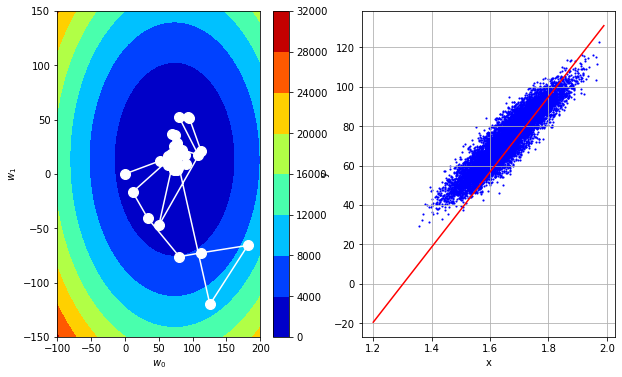

In [79]:
base

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)